### **Spaceship Titanic**<br>
**Predict which passengers are transported to an alternate dimension**

`Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.`

`The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.`

`While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!`

<img src="joel-filipe-QwoNAhbmLLo-unsplash.jpg" alt="Alt Text" width="400" height="300">


**`To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.`**

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer


In [2]:
# Load the train data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print('Training dataset shape is: ', train_data.shape)
print('Testing data shape is: ', test_data.shape)

Training dataset shape is:  (8693, 14)
Testing data shape is:  (4277, 13)


**The training dataset contains 8693 rows and 14 columns.<br> The testing data contains 4277 rows and 13 columns**

In [4]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
# Checking duplicates
print(f'Duplicates on training data: {train_data.duplicated().sum()}, ({100*train_data.duplicated().sum()/len(train_data)})%')
print(f'Duplicates on the testing data: {test_data.duplicated().sum()}, ({100*test_data.duplicated().sum()/len(test_data)})% ')

Duplicates on training data: 0, (0.0)%
Duplicates on the testing data: 0, (0.0)% 


In [7]:
# Check the datatypes of the datasets's columns
print('Training dataset data types:\n', train_data.dtypes)
print('\n'+'#'*100)
print('\nData types of features in the testing data:\n', test_data.dtypes)

Training dataset data types:
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

####################################################################################################

Data types of features in the testing data:
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


**We can observe that CryoSleep & VIP features contains boolean values but their data type is object so we have to convert their data-type to bool.**

In [8]:
df1 = (train_data.isnull().sum()[train_data.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing Values"})
df1["% of Missing Values"] = round((100*train_data.isnull().sum()/len(train_data)),2)
print('Missing values in the training dataste:\n', df1)

print('\n'+ '#'*100)

df2 = (test_data.isnull().sum()[test_data.isnull().sum()>0]).to_frame().rename(columns={0:'Number of Missing Values'})
df2['% of Missing Values'] = round((100*test_data.isnull().sum()/len(test_data)),2)
print('\nMissing values in the testing data:\n', df2)

Missing values in the training dataste:
               Number of Missing Values  % of Missing Values
HomePlanet                         201                 2.31
CryoSleep                          217                 2.50
Cabin                              199                 2.29
Destination                        182                 2.09
Age                                179                 2.06
VIP                                203                 2.34
RoomService                        181                 2.08
FoodCourt                          183                 2.11
ShoppingMall                       208                 2.39
Spa                                183                 2.11
VRDeck                             188                 2.16
Name                               200                 2.30

####################################################################################################

Missing values in the testing data:
               Number of Missing Values 

**Quite a number of columns contain missing values.<br>However, there is very less % of missing values in both training & testing data. <br>So instead of dropping those missing values we will fill/replace those missing values with best suitable values according to the data.**

In [9]:
# Checking cardinality of categorical features
print('Cardinality of features in the training data:\n', train_data.select_dtypes(include='object').nunique())
print('\n'+'#'*100)
print('\nCardinality of categorical features in the testing data:\n', test_data.select_dtypes(include='object').nunique())

Cardinality of features in the training data:
 PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

####################################################################################################

Cardinality of categorical features in the testing data:
 PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


**We can observe that PassengerId, Cabin & Name feature of both datasets are having high cardinality.**

### **Exploratory Data Analysis (EDA)**

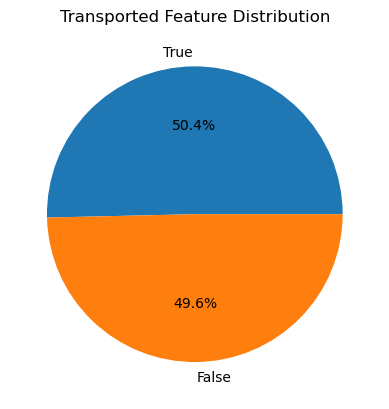

In [10]:
# Transported
plt.pie(train_data["Transported"].value_counts(),labels=train_data["Transported"].value_counts().keys(),autopct="%1.1f%%")
plt.title("Transported Feature Distribution");

**We can observe that our Transported Feature is highly balanced.**

In [11]:
# Examine the homeplanet column
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

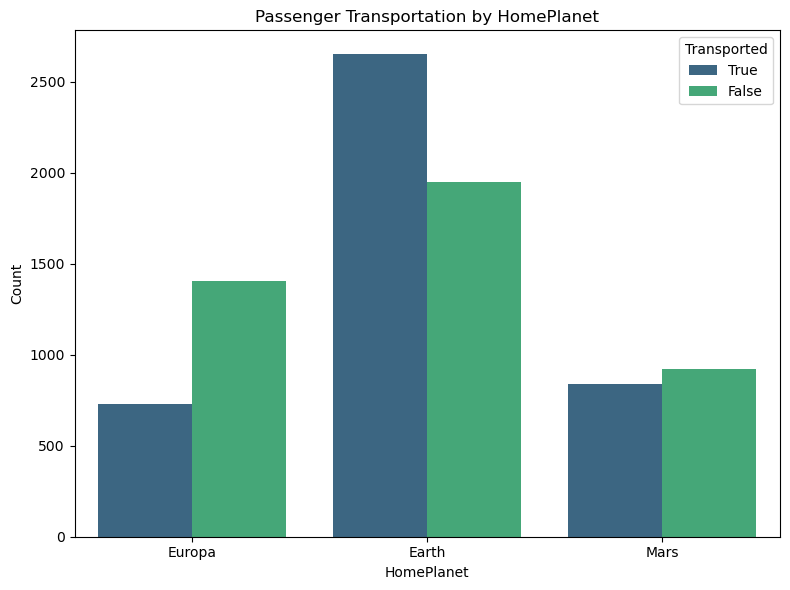

In [12]:
# Bar plot (HomePlanet)
plt.figure(figsize=(8, 6))
sns.countplot(data= train_data, x='HomePlanet', hue='Transported', palette='viridis')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Passenger Transportation by HomePlanet')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**From the bar plot, most passengers who were transported were from planet earth.**

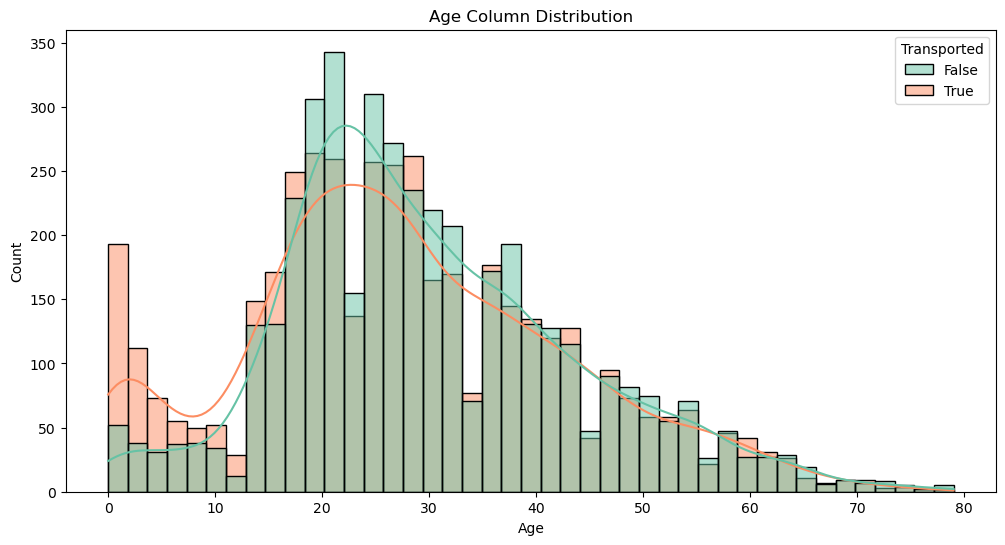

In [13]:
# Age distribution
plt.figure(figsize=(12,6))
sns.histplot(data=train_data, x='Age', hue='Transported',kde=True, palette='Set2')
plt.title('Age Column Distribution')
plt.show();

**Most of the passengers were between age 18-32.<br>Age from 0-18 passengers are highly transported when compared with not transported passengers espically for those who were new born.<br>Age from 18-32 passengers are comparatively less transported when compared to not transported passengers.<br>Age above 32 seems to be equally transported when compared to not transported passengers.**

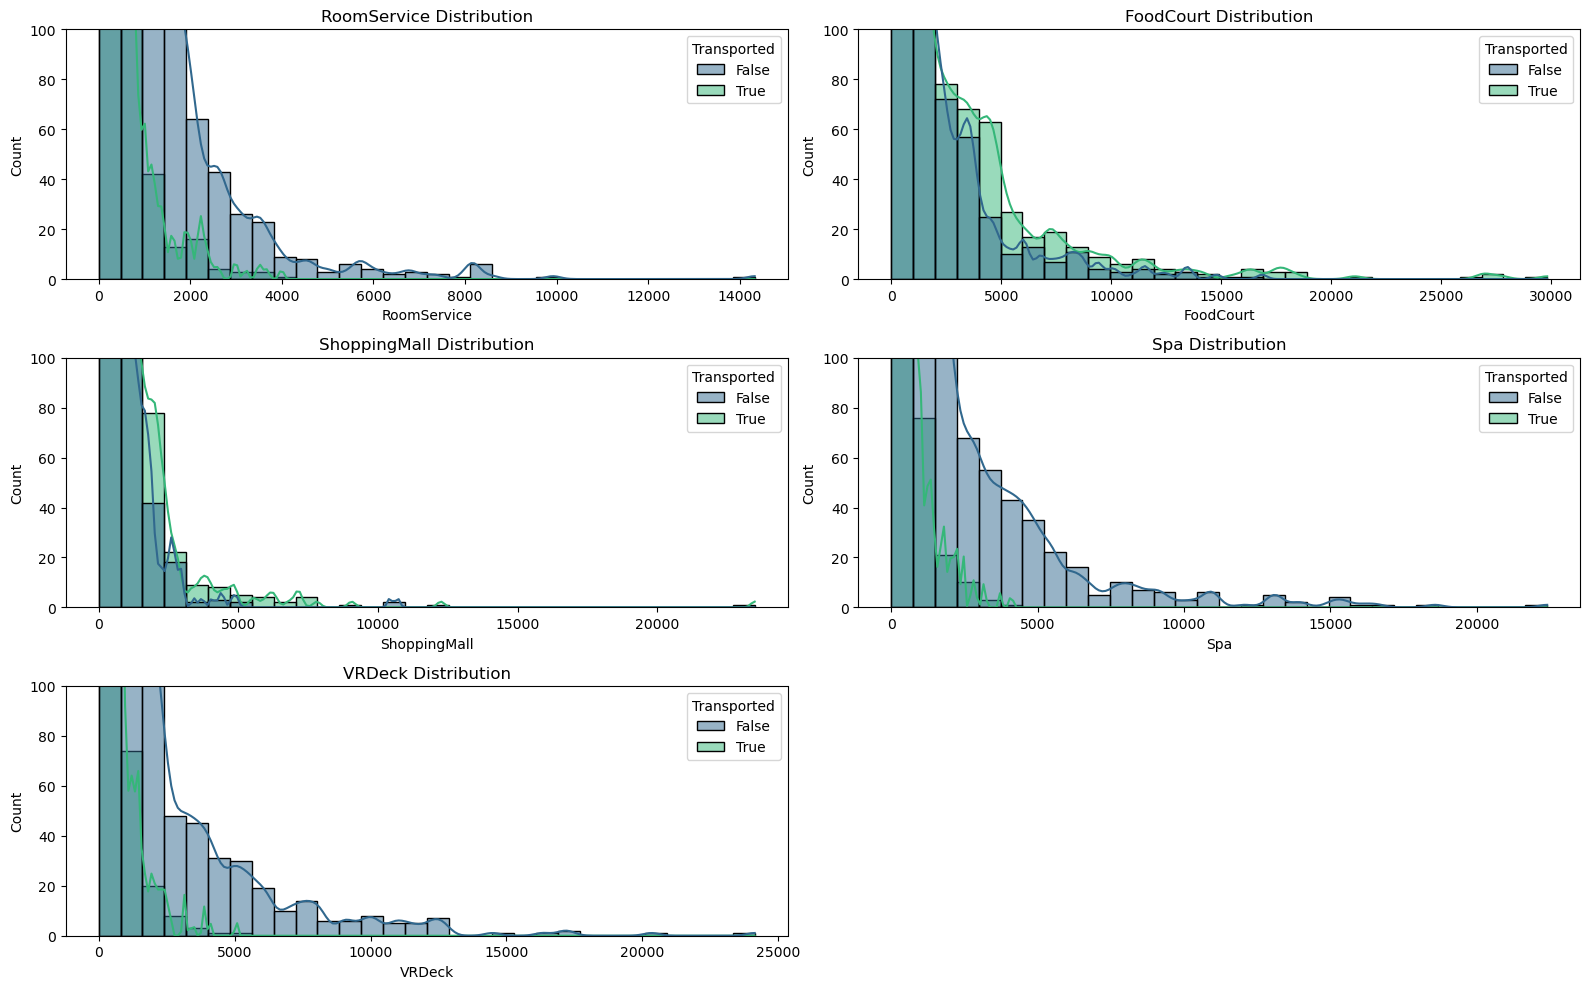

In [14]:
# Visualizing the expenditure columns
exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(16,10))
for idx, column in enumerate(exp_cols):
    plt.subplot(3,2, idx+1)
    sns.histplot(data=train_data, x=column, hue='Transported', kde=True, palette='viridis', bins=30)
    plt.title(f'{column} Distribution')
    plt.ylim(0,100)
    plt.tight_layout();

**We can observe that most of the passengers don't seem to spend any money.<br><br>Since most of the expenses are 0 so the values with higher expenses are kind of outliers in our data.<br><br>We can observe that RoomService,Spa & VRDeck seems to have similar distributions.<br><br>We can also observe that FoodCourt & ShoppingMall are having kind of similar distributions.<br><br>All the expenditure features distribution is Right-Skewed.<br><br>Passengers having less expenses are more likely to be transported than passengers having high expenses.**

In [15]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

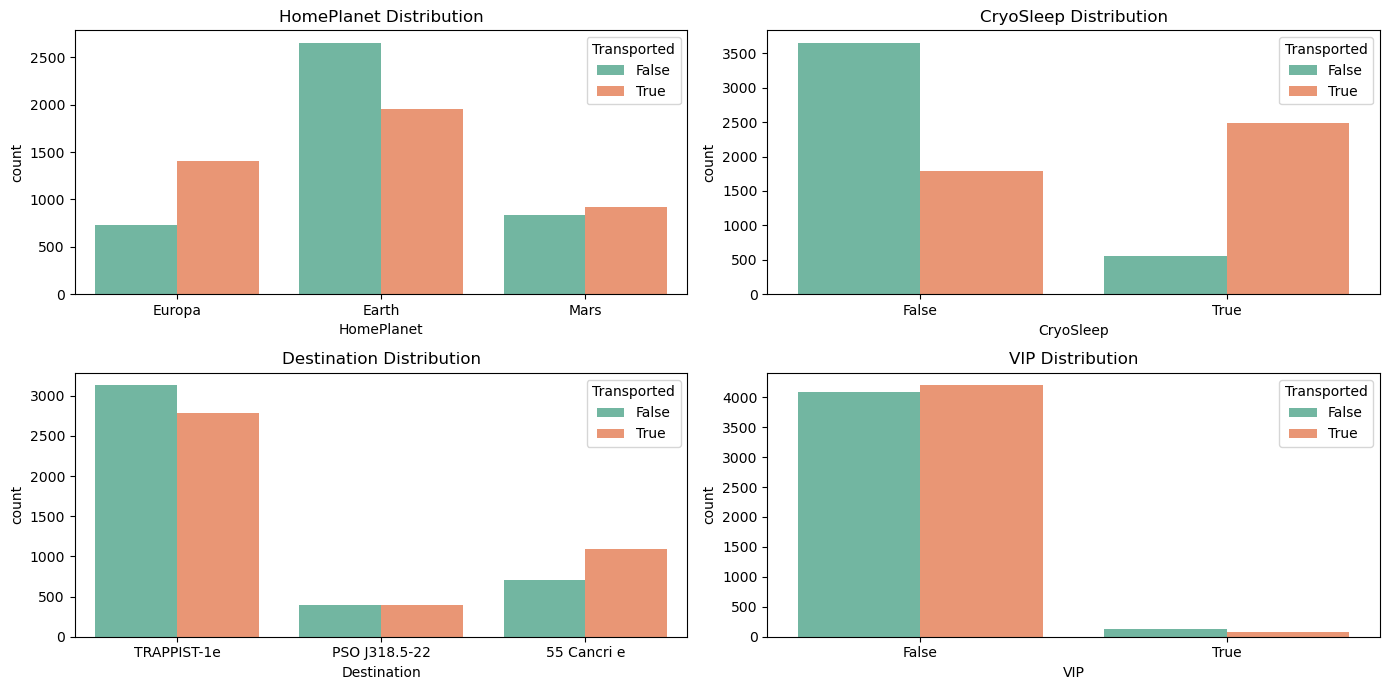

In [16]:
# Visualizing categorical columns
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination','VIP']

plt.figure(figsize=(14,7))
for idx, column in enumerate(cat_cols):
    plt.subplot(2,2, idx+1)
    sns.countplot(data=train_data, x=column, hue='Transported', palette='Set2')
    plt.title(f'{column} Distribution')
    plt.tight_layout();

**In HomePlanet feature most of passengers are from Earth but passenger from Earth are Comparatively Less Transported, passenger from Mars are Equally Transported, and passengers from Europa are Highly Transported.<br>The graph shows that there are more passengers not transported in cryosleep than passengers transported in cryosleep.<br>In Destination feature most of the passengers are transported to Trappist-1e.**

### **Feature Engineering**

In [17]:
# PassengerId
# A unique Id for each passenger.
# Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.

def passengerid_new_features(df):
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] = df["PassengerId"].apply(lambda x: x.split("_")[1])

    # Count how many members are in each group and sort the counts.
    group_member_counts = df.groupby("Group")["Member"].count().sort_values()

    # Identify groups with more than one member.
    groups_with_multiple_members = set(group_member_counts[group_member_counts > 1].index)

    # Create a new feature "Travelling_Solo" to indicate if a person is traveling alone or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in groups_with_multiple_members)

    # Create a new feature to indicate the number of members in each group.
    df["Group_Members"] = 0
    for group, size in group_member_counts.items():
        df.loc[df["Group"] == group, "Group_Members"] = size

passengerid_new_features(test_data)
passengerid_new_features(train_data)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Members
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,True,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,True,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,True,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,False,2


In [18]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Member,Travelling_Solo,Group_Members
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,True,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,True,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,True,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,True,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,02,False,2
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,01,True,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,01,True,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,01,True,1


In [19]:
train_data = train_data.drop(['Group', 'Member'], axis=1)
test_data = test_data.drop(['Group', 'Member'], axis=1)

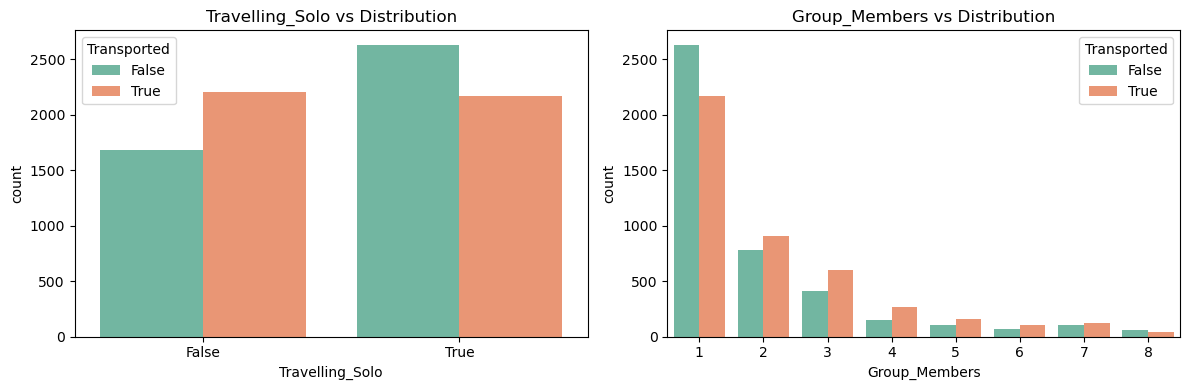

In [20]:
# Visualize the traveling solo and group members column
column_passenger = ['Travelling_Solo', 'Group_Members']

plt.figure(figsize=(12,4))
for idx, column in enumerate(column_passenger):
    plt.subplot(1,2, idx+1)
    sns.countplot(data=train_data, x=column, hue='Transported', palette='Set2')
    plt.title(f'{column} vs Distribution')
    plt.tight_layout();

**We can observe that most members are travelling alone. <br>In addition, passengers travelling alone are less transported compared to those traveling in a group**

In [21]:
# Cabin Column
train_data['Cabin'].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


**The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.**

In [22]:
import numpy as np
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode(),inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode(),inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

cabin_new_feature(test_data)
cabin_new_feature(train_data)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2,E,608,S


In [23]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False,2,G,1496,S
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,True,1,NaN,442.0,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True,1,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,True,1,D,297,P


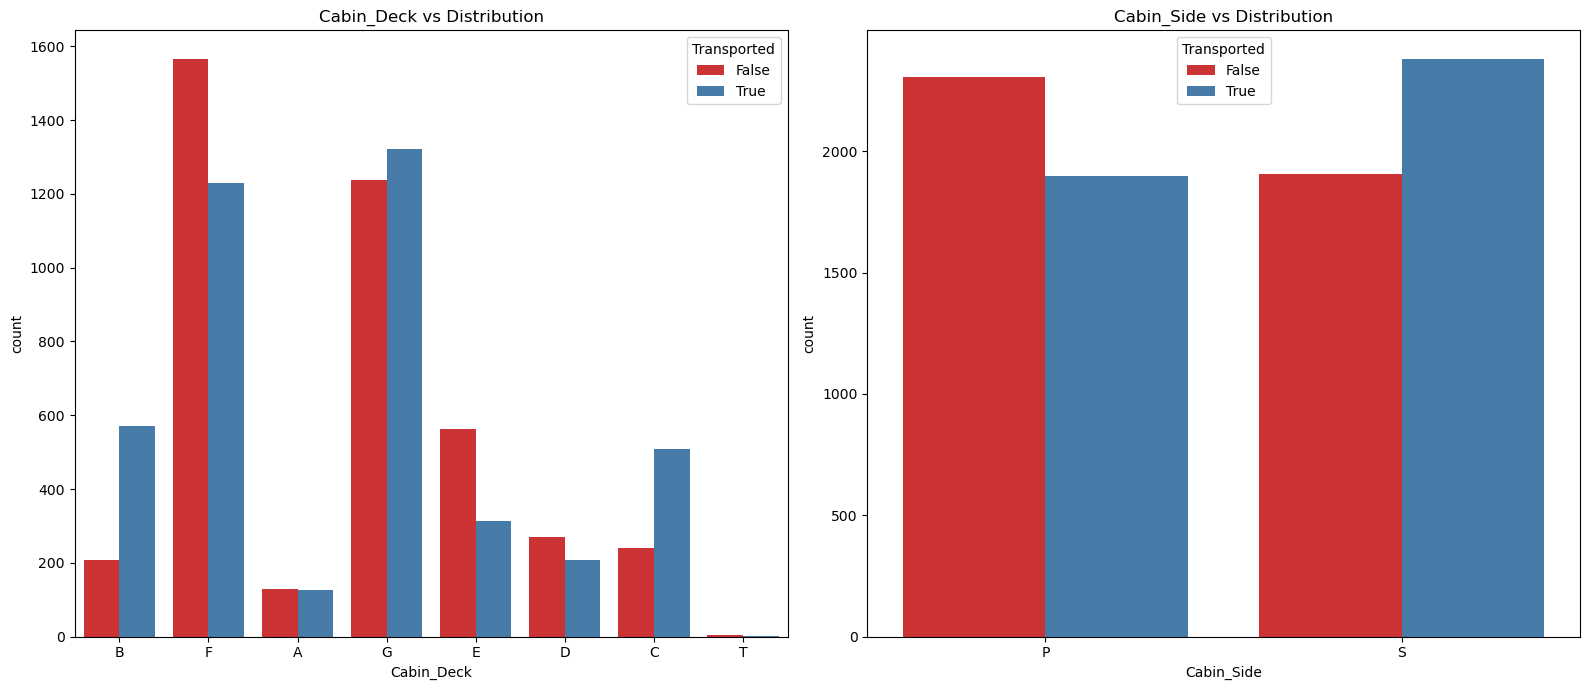

In [24]:
# Visualize the cabin features
cabin_cols = ['Cabin_Deck', 'Cabin_Side']

plt.figure(figsize=(16,7))
for idx, column in enumerate(cabin_cols):
    plt.subplot(1,2, idx+1)
    sns.countplot(data=train_data,x=column, hue='Transported', palette='Set1')
    plt.title(f'{column} vs Distribution')
    plt.tight_layout();

**From Cabin_Deck we can observe that most of the people are from F & G.<br>Passengers from Cabin Deck B & C are very highly transported.<br><br>From Cabin_Side we can observe that almost half of the passengers were from cabin side S and half from cabin side P.<br>But passengers from cabin_side S are Highly Transported**

In [25]:
train_data.dtypes

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Name                object
Transported           bool
Travelling_Solo       bool
Group_Members        int64
Cabin_Deck          object
Cabin_Number        object
Cabin_Side          object
dtype: object

In [26]:
test_data.dtypes

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Name                object
Travelling_Solo       bool
Group_Members        int64
Cabin_Deck          object
Cabin_Number        object
Cabin_Side          object
dtype: object

**We can observe that the cabin number column is of object type, so we change it to integer**

In [27]:
# Convert to integer
train_data['Cabin_Number'] = train_data['Cabin_Number'].astype(int)
test_data['Cabin_Number'] = test_data['Cabin_Number'].astype(int)

In [28]:
# Age column
train_data.Age.head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [29]:
# (Age)
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=18:
            age_group.append("0-18")
        elif (i>18 and i<=26):
            age_group.append("19-26")
        elif (i>26 and i<=34):
            age_group.append("27-34")
        elif (i>34 and i<=45):
            age_group.append("35-45")
        elif (i>45 and i<=60):
            age_group.append("46-60")
        elif (i>60):
            age_group.append("60+")
        else:
            age_group.append(np.nan)
        
    df["Age_Group"] = age_group

age_group(test_data)
age_group(train_data)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side,Age_Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,35-45
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,19-26
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S,46-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S,27-34
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1,A,98,P,35-45
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1,G,1499,S,0-18
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1,G,1500,S,19-26
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2,E,608,S,27-34


In [30]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side,Age_Group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,3,S,27-34
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,4,S,19-26
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,0,S,27-34
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,1,S,35-45
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,5,S,19-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False,2,G,1496,S,27-34
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,True,1,NaN,442,NaN,35-45
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True,1,D,296,P,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,True,1,D,297,P,NaN


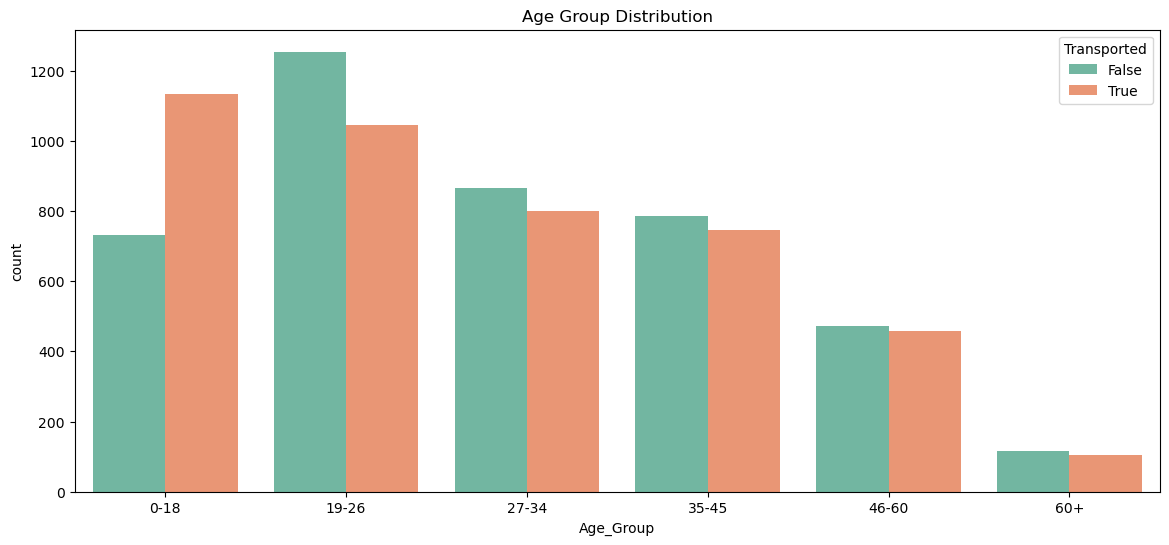

In [31]:
order = ['0-18', '19-26', '27-34', '35-45', '46-60', '60+']

plt.figure(figsize=(14,6))
sns.countplot(x="Age_Group",hue="Transported", data=train_data, palette="Set2", order=order)
plt.title("Age Group Distribution");

**Age group 0-18 are most likely to be transported.**

In [32]:
train_data['Age_Group'].value_counts().to_frame()

,Age_Group
19-26,2299
0-18,1865
27-34,1666
35-45,1533
46-60,931
60+,220


**Most of the passengers are in Age group 19-26**

In [33]:
# The expenditure columns
train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [34]:
print('The expenditure columns are: ',exp_cols)
print('\n')

def total_spending(df):
    df['Total_Spending'] = df[exp_cols].sum(axis=1)
    df['No_Spending'] = (df['Total_Spending']==0)

total_spending(test_data)
total_spending(train_data)
train_data

The expenditure columns are:  ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side,Age_Group,Total_Spending,No_Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,True,1,B,0,P,35-45,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,True,1,F,0,S,19-26,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,False,2,A,0,S,46-60,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,False,2,A,0,S,27-34,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,True,1,F,1,S,0-18,1091.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,Gravior Noxnuther,False,True,1,A,98,P,35-45,8536.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,Kurta Mondalley,False,True,1,G,1499,S,0-18,0.0,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,Fayey Connon,True,True,1,G,1500,S,19-26,1873.0,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,Celeon Hontichre,False,False,2,E,608,S,27-34,4637.0,False


In [35]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side,Age_Group,Total_Spending,No_Spending
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0.0,Nelly Carsoning,True,1,G,3,S,27-34,0.0,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0.0,Lerome Peckers,True,1,F,4,S,19-26,2832.0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,True,1,C,0,S,27-34,0.0,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,True,1,C,1,S,35-45,7418.0,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0.0,Brence Harperez,True,1,F,5,S,19-26,645.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,0.0,Jeron Peter,False,2,G,1496,S,27-34,0.0,True
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,144.0,Matty Scheron,True,1,NaN,442,NaN,35-45,1018.0,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0.0,Jayrin Pore,True,1,D,296,P,NaN,0.0,True
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,523.0,Kitakan Conale,True,1,D,297,P,NaN,3203.0,False


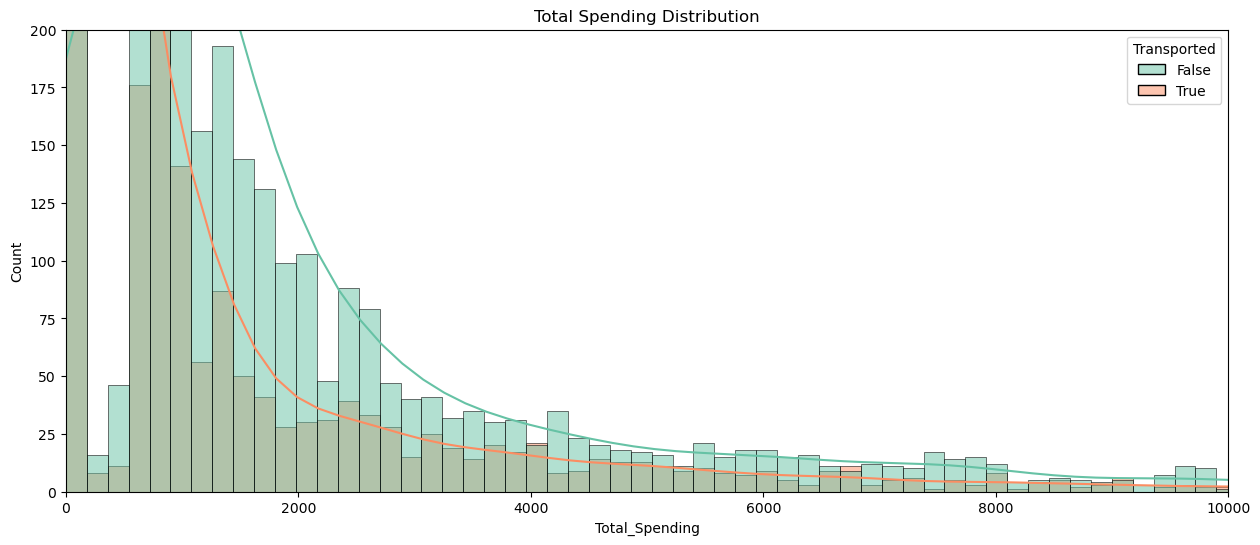

In [36]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total_Spending", hue="Transported", data=train_data, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Spending Distribution");

In [37]:
# Total Spending statistics
mean = round(train_data['Total_Spending'].mean())
median = train_data['Total_Spending'].median()

print('Total Spending Mean: ', mean)
print('Total Spending Median: ', median)

Total Spending Mean:  1441
Total Spending Median:  716.0


**These statistics is what we are going to use to create an ordinal categories in the Total Spending column**

In [38]:
# Ordinal Categories
def ordinal_categories(df):
    spending_levels = []

    for i in df['Total_Spending']:
        if i==0:
            spending_levels.append('No Expense')
        elif (i>0 and i<=716):
            spending_levels.append('Low Expense')
        elif (i>716 and i<=1441):
            spending_levels.append('Medium Expense')
        else:
            spending_levels.append('High Expense')

    df['Spending'] = spending_levels


In [39]:
ordinal_categories(train_data)
ordinal_categories(test_data)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side,Age_Group,Total_Spending,No_Spending,Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,True,1,B,0,P,35-45,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,True,1,F,0,S,19-26,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,False,2,A,0,S,46-60,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,False,2,A,0,S,27-34,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,True,1,F,1,S,0-18,1091.0,False,Medium Expense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,False,True,1,A,98,P,35-45,8536.0,False,High Expense
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,False,True,1,G,1499,S,0-18,0.0,True,No Expense
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,True,True,1,G,1500,S,19-26,1873.0,False,High Expense
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,False,False,2,E,608,S,27-34,4637.0,False,High Expense


In [40]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Travelling_Solo,Group_Members,Cabin_Deck,Cabin_Number,Cabin_Side,Age_Group,Total_Spending,No_Spending,Spending
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,Nelly Carsoning,True,1,G,3,S,27-34,0.0,True,No Expense
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,Lerome Peckers,True,1,F,4,S,19-26,2832.0,False,High Expense
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,Sabih Unhearfus,True,1,C,0,S,27-34,0.0,True,No Expense
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,Meratz Caltilter,True,1,C,1,S,35-45,7418.0,False,High Expense
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,Brence Harperez,True,1,F,5,S,19-26,645.0,False,Low Expense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,Jeron Peter,False,2,G,1496,S,27-34,0.0,True,No Expense
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,Matty Scheron,True,1,NaN,442,NaN,35-45,1018.0,False,Medium Expense
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Jayrin Pore,True,1,D,296,P,NaN,0.0,True,No Expense
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,Kitakan Conale,True,1,D,297,P,NaN,3203.0,False,High Expense


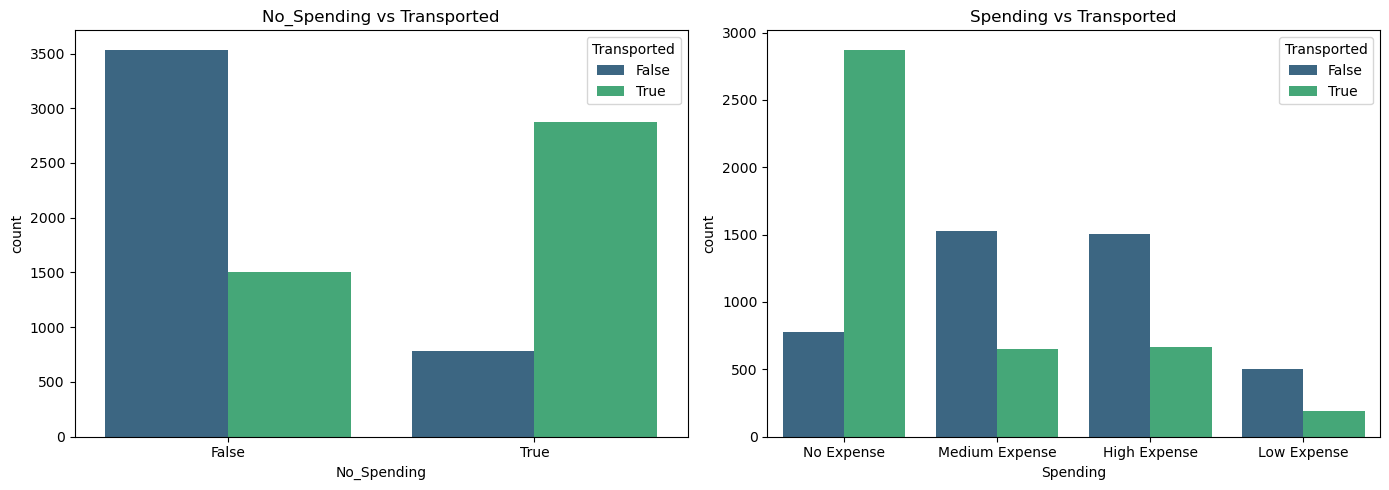

In [41]:
cols = ['No_Spending', 'Spending']

plt.figure(figsize=(14,5))
for idx, column in enumerate(cols):
    plt.subplot(1,2, idx+1)
    sns.countplot(data=train_data, x=column, hue='Transported', palette='viridis')
    plt.title(f'{column} vs Transported')
    plt.tight_layout();

**In No Spending feature we can observe that passenger having No Spending are highly transported.<br>In the spending feature we can confirm that passengers having No Expense are highly transported .**

## **Data Preprocessing**
### **Dealing with missing values**

In [42]:
missing = train_data.isnull().sum() [train_data.isnull().sum()>0].to_frame().rename(columns={0:'Sum of Missing Values'})
missing['% of Missing Values'] = round(train_data.isnull().sum(),2)
missing

,Sum of Missing Values,% of Missing Values
HomePlanet,201,201
CryoSleep,217,217
Destination,182,182
Age,179,179
VIP,203,203
RoomService,181,181
FoodCourt,183,183
ShoppingMall,208,208
Spa,183,183
VRDeck,188,188


<AxesSubplot:>

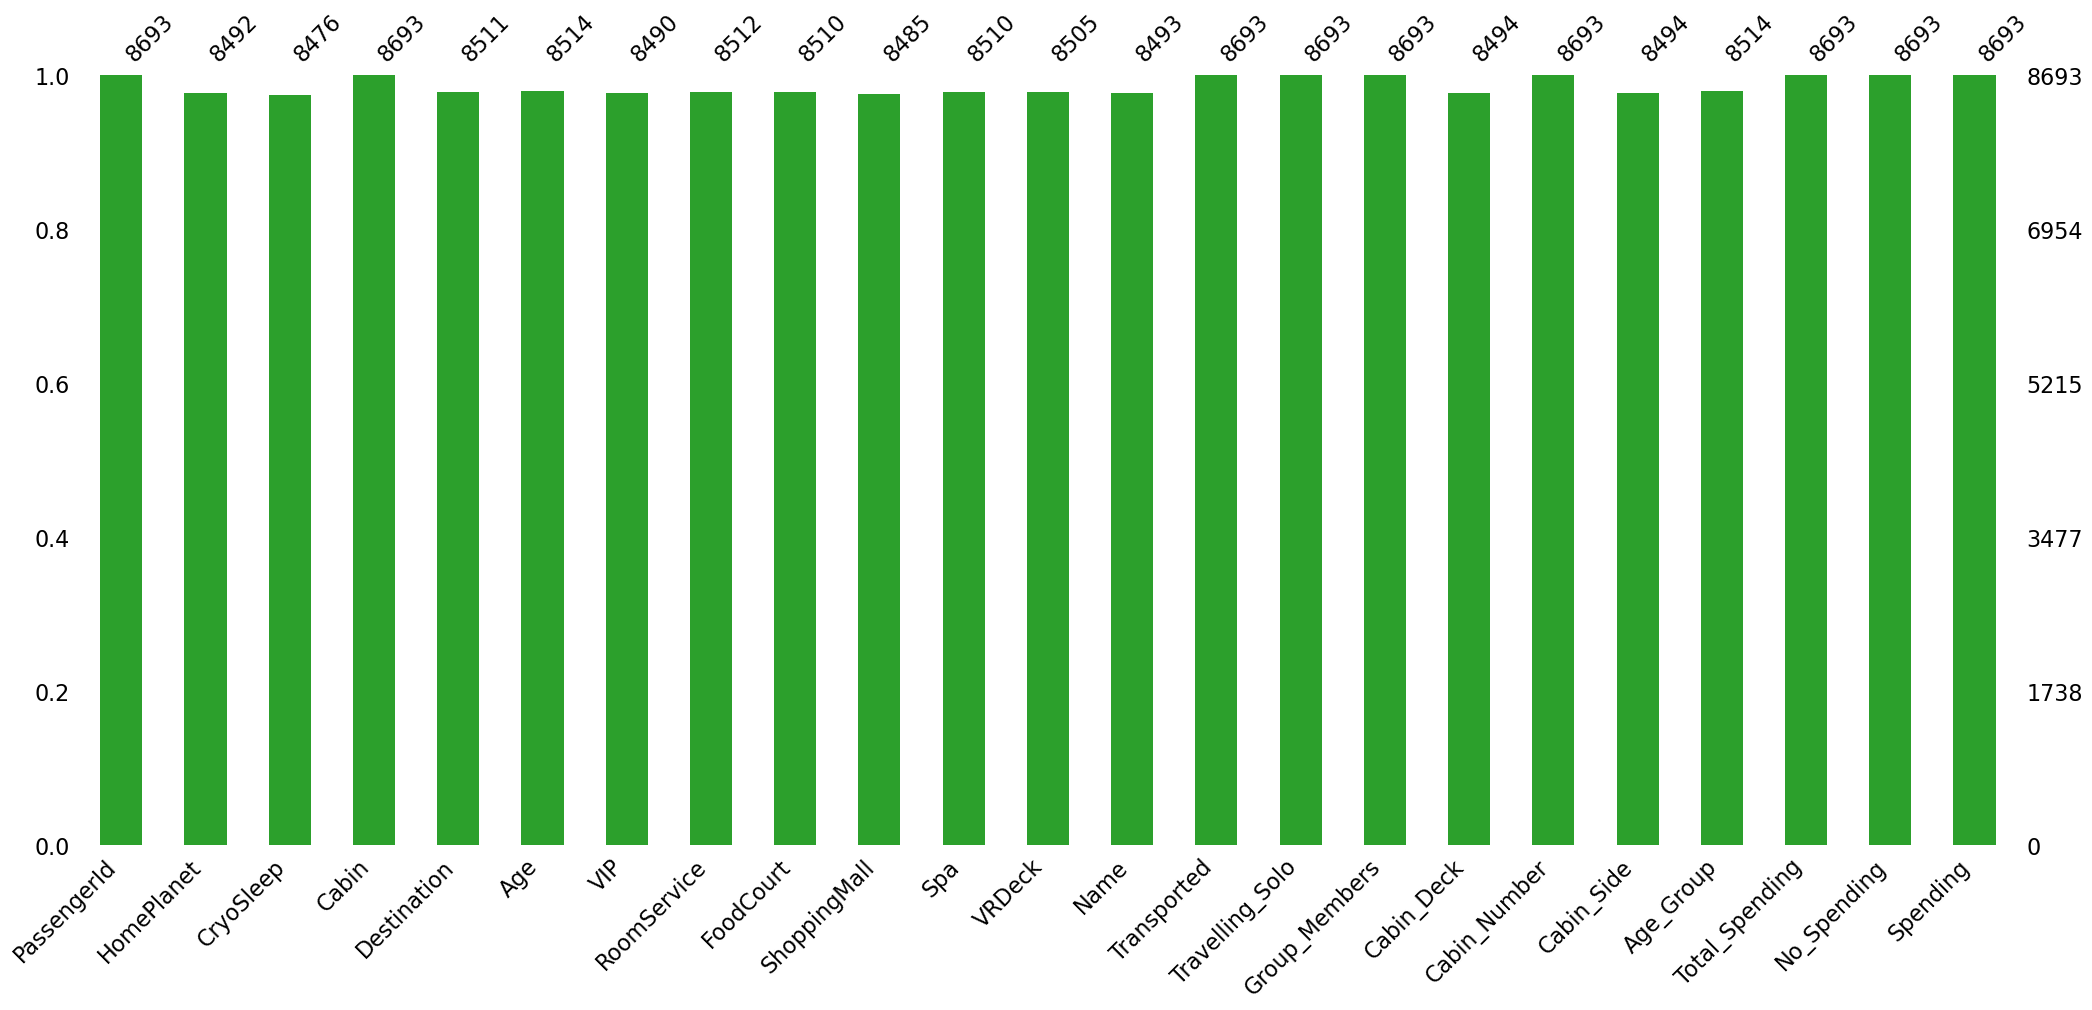

In [43]:
# Visualize missing values
import missingno as msno

msno.bar(train_data, color='C2')

In [44]:
# Categorical and Numericla Columns
cat_cols = train_data.select_dtypes(include=['object', 'bool']).columns.to_list()
cat_cols.remove('Transported')
print('Categorical columns: ', cat_cols)

num_cols = train_data.select_dtypes(include=['int', 'float']).columns.to_list()
print('Numerical Columns: ', num_cols)

Categorical columns:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Age_Group', 'No_Spending', 'Spending']
Numerical Columns:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Members', 'Cabin_Number', 'Total_Spending']


In [45]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [46]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

imputer_preprocessor = ColumnTransformer(transformers=[
    ('cat_imputer', cat_imputer, cat_cols),
    ('num_imputer', num_imputer, num_cols)
])

pipeline = Pipeline([
    ('transformer', imputer_preprocessor)
])

train_data_filled = pipeline.fit_transform(train_data)

# Transform the test data (do not fit to prevent data leakage)
test_data_filled = pipeline.transform(test_data)

In [47]:
# Convert the NumPy arrays back to DataFrames with column names
train_data_filled = pd.DataFrame(train_data_filled, columns=cat_cols + num_cols)
test_data_filled = pd.DataFrame(test_data_filled, columns=cat_cols + num_cols)

# Add the 'Transported' column back to train_data
train_data_filled['Transported'] = train_data['Transported']

print("Missing values left in training data is:", train_data_filled.isnull().sum().sum())
print("Missing values left in testing data is:", test_data_filled.isnull().sum().sum())

Missing values left in training data is: 0
Missing values left in testing data is: 0


In [48]:
train_data_filled

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Travelling_Solo,Cabin_Deck,Cabin_Side,...,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Members,Cabin_Number,Total_Spending,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,True,B,P,...,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True,F,S,...,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0.0,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False,A,S,...,58.0,43.0,3576.0,0.0,6715.0,49.0,2.0,0.0,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False,A,S,...,33.0,0.0,1283.0,371.0,3329.0,193.0,2.0,0.0,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True,F,S,...,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,1091.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,True,A,P,...,41.0,0.0,6819.0,0.0,1643.0,74.0,1.0,98.0,8536.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,True,G,S,...,18.0,0.0,0.0,0.0,0.0,0.0,1.0,1499.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True,G,S,...,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,1500.0,1873.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False,E,S,...,32.0,0.0,1049.0,0.0,353.0,3235.0,2.0,608.0,4637.0,False


In [49]:
test_data_filled

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Travelling_Solo,Cabin_Deck,Cabin_Side,...,Spending,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Members,Cabin_Number,Total_Spending
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning,True,G,S,...,No Expense,27.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers,True,F,S,...,High Expense,19.0,0.0,9.0,0.0,2823.0,0.0,1.0,4.0,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus,True,C,S,...,No Expense,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter,True,C,S,...,High Expense,38.0,0.0,6652.0,0.0,181.0,585.0,1.0,1.0,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez,True,F,S,...,Low Expense,20.0,10.0,0.0,635.0,0.0,0.0,1.0,5.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter,False,G,S,...,No Expense,34.0,0.0,0.0,0.0,0.0,0.0,2.0,1496.0,0.0
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,False,Matty Scheron,True,F,S,...,Medium Expense,42.0,0.0,847.0,17.0,10.0,144.0,1.0,442.0,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore,True,D,P,...,No Expense,27.0,0.0,0.0,0.0,0.0,0.0,1.0,296.0,0.0
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,False,Kitakan Conale,True,D,P,...,High Expense,27.0,0.0,2680.0,0.0,0.0,523.0,1.0,297.0,3203.0


In [50]:
columns = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Group_Members','Cabin_Number','Total_Spending']

train_data_filled[columns] = train_data_filled[columns].astype(int)
test_data_filled[columns] = test_data_filled[columns].astype(int)

In [51]:
train_data_filled.dtypes

PassengerId        object
HomePlanet         object
CryoSleep          object
Cabin              object
Destination        object
VIP                object
Name               object
Travelling_Solo    object
Cabin_Deck         object
Cabin_Side         object
Age_Group          object
No_Spending        object
Spending           object
Age                 int32
RoomService         int32
FoodCourt           int32
ShoppingMall        int32
Spa                 int32
VRDeck              int32
Group_Members       int32
Cabin_Number        int32
Total_Spending      int32
Transported          bool
dtype: object

In [52]:
# Checking duplicates
print('Number of Duplicates in the Training Data: ', train_data_filled.duplicated().sum())
print('Number of Duplicates in the Testing Data: ', test_data_filled.duplicated().sum())


Number of Duplicates in the Training Data:  0
Number of Duplicates in the Testing Data:  0


In [53]:
# Check cardinality
print('Cardinality of the training data: \n', train_data_filled.select_dtypes(include='object').nunique())
print('\n'+'#'*100)

print('\nCardinality of the testing data: \n', test_data_filled.select_dtypes(include='object').nunique())


Cardinality of the training data: 
 PassengerId        8693
HomePlanet            3
CryoSleep             2
Cabin              6561
Destination           3
VIP                   2
Name               8473
Travelling_Solo       2
Cabin_Deck            8
Cabin_Side            2
Age_Group             6
No_Spending           2
Spending              4
dtype: int64

####################################################################################################

Cardinality of the testing data: 
 PassengerId        4277
HomePlanet            3
CryoSleep             2
Cabin              3266
Destination           3
VIP                   2
Name               4177
Travelling_Solo       2
Cabin_Deck            8
Cabin_Side            2
Age_Group             6
No_Spending           2
Spending              4
dtype: int64


In [54]:
# Dropping features with high cardinallity
test = test_data_filled[['PassengerId']] # To use when predicting

#columns with high cardinality
high_card = ['PassengerId', 'Cabin', 'Name']
train_data_filled =train_data_filled.drop(high_card, axis=1) 
test_data_filled = test_data_filled.drop(high_card, axis=1)

In [55]:
train_data_filled

,HomePlanet,CryoSleep,Destination,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Members,Cabin_Number,Total_Spending,Transported
0,Europa,False,TRAPPIST-1e,False,True,B,P,35-45,True,No Expense,39,0,0,0,0,0,1,0,0,False
1,Earth,False,TRAPPIST-1e,False,True,F,S,19-26,False,Medium Expense,24,109,9,25,549,44,1,0,736,True
2,Europa,False,TRAPPIST-1e,True,False,A,S,46-60,False,High Expense,58,43,3576,0,6715,49,2,0,10383,False
3,Europa,False,TRAPPIST-1e,False,False,A,S,27-34,False,High Expense,33,0,1283,371,3329,193,2,0,5176,False
4,Earth,False,TRAPPIST-1e,False,True,F,S,0-18,False,Medium Expense,16,303,70,151,565,2,1,1,1091,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,True,A,P,35-45,False,High Expense,41,0,6819,0,1643,74,1,98,8536,False
8689,Earth,True,PSO J318.5-22,False,True,G,S,0-18,True,No Expense,18,0,0,0,0,0,1,1499,0,False
8690,Earth,False,TRAPPIST-1e,False,True,G,S,19-26,False,High Expense,26,0,0,1872,1,0,1,1500,1873,True
8691,Europa,False,55 Cancri e,False,False,E,S,27-34,False,High Expense,32,0,1049,0,353,3235,2,608,4637,False


In [56]:
test_data_filled

,HomePlanet,CryoSleep,Destination,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Members,Cabin_Number,Total_Spending
0,Earth,True,TRAPPIST-1e,False,True,G,S,27-34,True,No Expense,27,0,0,0,0,0,1,3,0
1,Earth,False,TRAPPIST-1e,False,True,F,S,19-26,False,High Expense,19,0,9,0,2823,0,1,4,2832
2,Europa,True,55 Cancri e,False,True,C,S,27-34,True,No Expense,31,0,0,0,0,0,1,0,0
3,Europa,False,TRAPPIST-1e,False,True,C,S,35-45,False,High Expense,38,0,6652,0,181,585,1,1,7418
4,Earth,False,TRAPPIST-1e,False,True,F,S,19-26,False,Low Expense,20,10,0,635,0,0,1,5,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,False,False,G,S,27-34,True,No Expense,34,0,0,0,0,0,2,1496,0
4273,Earth,False,TRAPPIST-1e,False,True,F,S,35-45,False,Medium Expense,42,0,847,17,10,144,1,442,1018
4274,Mars,True,55 Cancri e,False,True,D,P,19-26,True,No Expense,27,0,0,0,0,0,1,296,0
4275,Europa,False,TRAPPIST-1e,False,True,D,P,19-26,False,High Expense,27,0,2680,0,0,523,1,297,3203


In [57]:
# Statistical information
train_data_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Members,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Cabin_Number,8693.0,596.398942,506.637799,0.0,173.0,427.0,983.0,1894.0
Total_Spending,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


The skewed expenditure columns include: ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


Text(0.5, 1.0, 'TOTAL SPENDING DISTRIBUTION')

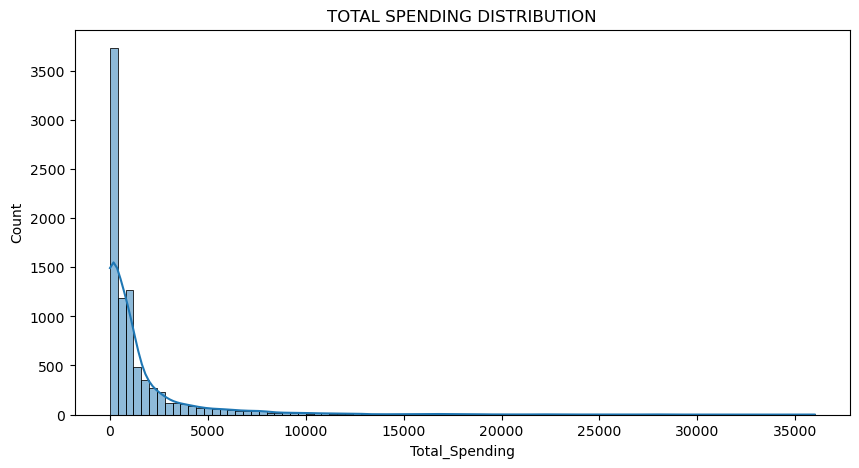

In [58]:
# Remember our expenditure columns were skewed therefore we will do log transformation on them
print('The skewed expenditure columns include:', exp_cols)

plt.figure(figsize=(10,5))
sns.histplot(train_data_filled['Total_Spending'], bins=90, kde=True)
plt.title('TOTAL SPENDING DISTRIBUTION')

**The total spending column is also right skewed we will log transform it to normal distribution.**

In [59]:
exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Total_Spending']
exp_cols

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Spending']

In [60]:
# Log Transformation
for i in exp_cols:
    train_data_filled[i] = np.log(1+train_data_filled[i])
    test_data_filled[i] = np.log(1+test_data_filled[i])


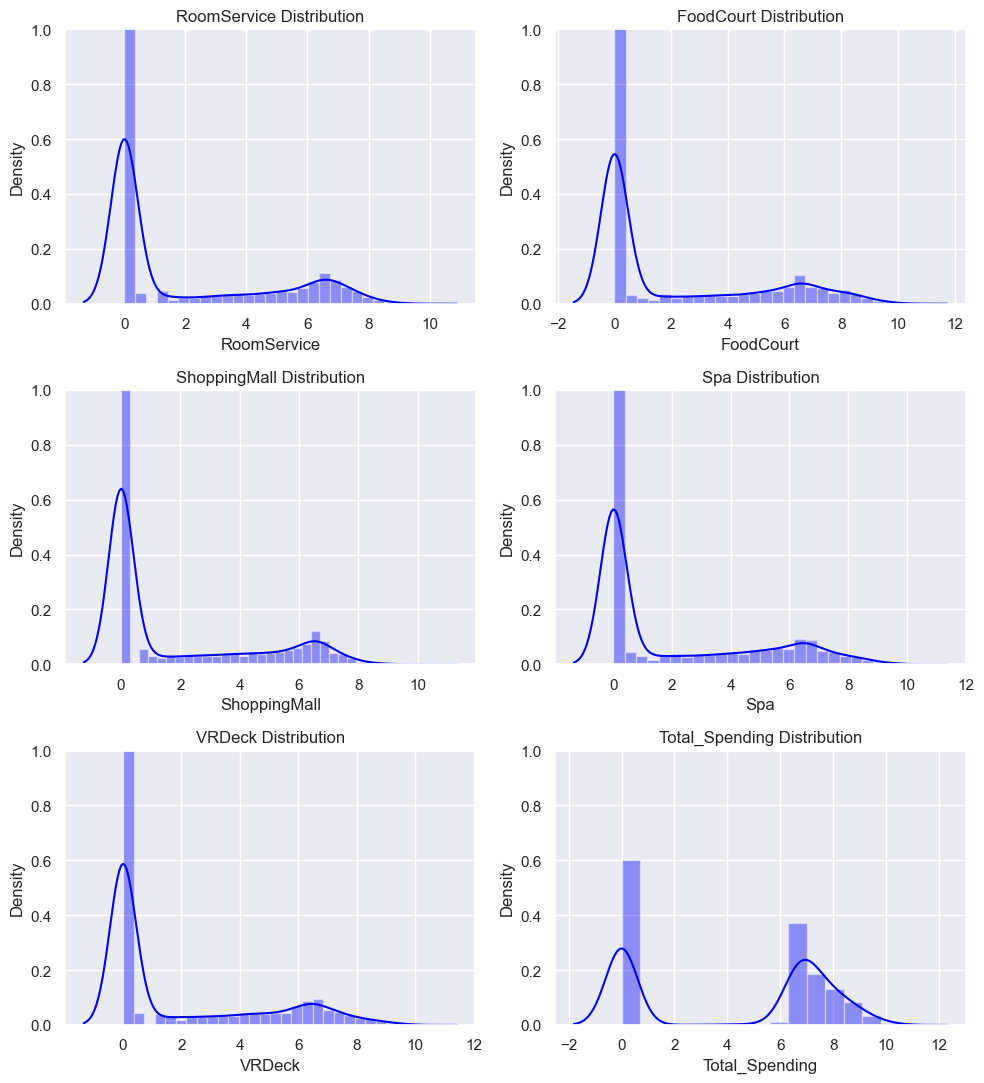

In [61]:
# Plot the distributions of the expenditure columns
sns.set(style="darkgrid")


plt.figure(figsize=(10,11))
for idx, column in enumerate(exp_cols):
    plt.subplot(3,2, idx+1)
    sns.distplot(train_data_filled[column], kde=True, color='blue')
    plt.ylim(0,1)
    plt.title(f'{column} Distribution')
    plt.tight_layout();


**The expenditure columns are now nirmaly distributed.**

In [62]:
train_data_filled

,HomePlanet,CryoSleep,Destination,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Members,Cabin_Number,Total_Spending,Transported
0,Europa,False,TRAPPIST-1e,False,True,B,P,35-45,True,No Expense,39,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0.000000,False
1,Earth,False,TRAPPIST-1e,False,True,F,S,19-26,False,Medium Expense,24,4.700480,2.302585,3.258097,6.309918,3.806662,1,0,6.602588,True
2,Europa,False,TRAPPIST-1e,True,False,A,S,46-60,False,High Expense,58,3.784190,8.182280,0.000000,8.812248,3.912023,2,0,9.248021,False
3,Europa,False,TRAPPIST-1e,False,False,A,S,27-34,False,High Expense,33,0.000000,7.157735,5.918894,8.110728,5.267858,2,0,8.551981,False
4,Earth,False,TRAPPIST-1e,False,True,F,S,0-18,False,Medium Expense,16,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,6.995766,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,True,A,P,35-45,False,High Expense,41,0.000000,8.827615,0.000000,7.404888,4.317488,1,98,9.052165,False
8689,Earth,True,PSO J318.5-22,False,True,G,S,0-18,True,No Expense,18,0.000000,0.000000,0.000000,0.000000,0.000000,1,1499,0.000000,False
8690,Earth,False,TRAPPIST-1e,False,True,G,S,19-26,False,High Expense,26,0.000000,0.000000,7.535297,0.693147,0.000000,1,1500,7.535830,True
8691,Europa,False,55 Cancri e,False,False,E,S,27-34,False,High Expense,32,0.000000,6.956545,0.000000,5.869297,8.082093,2,608,8.442039,False


**In our dataset, some of the columns have `True` and `False` values which are objects so we change them to boolean values.**

In [63]:
boolean = ['CryoSleep', 'VIP', 'Travelling_Solo', 'No_Spending']

train_data_filled[boolean] = train_data_filled[boolean].astype(bool)
test_data_filled[boolean] = test_data_filled[boolean].astype(bool)

In [64]:
train_data_filled.dtypes

HomePlanet          object
CryoSleep             bool
Destination         object
VIP                   bool
Travelling_Solo       bool
Cabin_Deck          object
Cabin_Side          object
Age_Group           object
No_Spending           bool
Spending            object
Age                  int32
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Group_Members        int32
Cabin_Number         int32
Total_Spending     float64
Transported           bool
dtype: object

### **Feature Encoding**

In [65]:
train_data_filled.head()

,HomePlanet,CryoSleep,Destination,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Members,Cabin_Number,Total_Spending,Transported
0,Europa,False,TRAPPIST-1e,False,True,B,P,35-45,True,No Expense,39,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0.000000,False
1,Earth,False,TRAPPIST-1e,False,True,F,S,19-26,False,Medium Expense,24,4.700480,2.302585,3.258097,6.309918,3.806662,1,0,6.602588,True
2,Europa,False,TRAPPIST-1e,True,False,A,S,46-60,False,High Expense,58,3.784190,8.182280,0.000000,8.812248,3.912023,2,0,9.248021,False
3,Europa,False,TRAPPIST-1e,False,False,A,S,27-34,False,High Expense,33,0.000000,7.157735,5.918894,8.110728,5.267858,2,0,8.551981,False
4,Earth,False,TRAPPIST-1e,False,True,F,S,0-18,False,Medium Expense,16,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,6.995766,True


In [66]:
# One Hot Encoding for the nominal columns
# Label encoding for the ordinal columns
from sklearn.preprocessing import LabelEncoder

nominal_cols = ['HomePlanet', 'Destination']
ordinal_cols = ['CryoSleep', 'VIP', 'Travelling_Solo', 'No_Spending', 'Spending', 'Cabin_Deck', 'Cabin_Side', 'Age_Group']

encoder = LabelEncoder()
train_data_filled[ordinal_cols] = train_data_filled[ordinal_cols].apply(encoder.fit_transform)
test_data_filled[ordinal_cols] = test_data_filled[ordinal_cols].apply(encoder.fit_transform)

train_data_filled = pd.get_dummies(train_data_filled, columns=nominal_cols)
test_data_filled = pd.get_dummies(test_data_filled, columns=nominal_cols)

In [67]:
train_data_filled

,CryoSleep,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,...,Group_Members,Cabin_Number,Total_Spending,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,1,1,0,3,1,3,39,0.000000,...,1,0,0.000000,False,0,1,0,0,0,1
1,0,0,1,5,1,1,0,2,24,4.700480,...,1,0,6.602588,True,1,0,0,0,0,1
2,0,1,0,0,1,4,0,0,58,3.784190,...,2,0,9.248021,False,0,1,0,0,0,1
3,0,0,0,0,1,2,0,0,33,0.000000,...,2,0,8.551981,False,0,1,0,0,0,1
4,0,0,1,5,1,0,0,2,16,5.717028,...,1,1,6.995766,True,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,1,0,0,3,0,0,41,0.000000,...,1,98,9.052165,False,0,1,0,1,0,0
8689,1,0,1,6,1,0,1,3,18,0.000000,...,1,1499,0.000000,False,1,0,0,0,1,0
8690,0,0,1,6,1,1,0,0,26,0.000000,...,1,1500,7.535830,True,1,0,0,0,0,1
8691,0,0,0,4,1,2,0,0,32,0.000000,...,2,608,8.442039,False,0,1,0,1,0,0


In [68]:
test_data_filled

,CryoSleep,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,...,VRDeck,Group_Members,Cabin_Number,Total_Spending,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0,1,6,1,2,1,3,27,0.000000,...,0.000000,1,3,0.000000,1,0,0,0,0,1
1,0,0,1,5,1,1,0,0,19,0.000000,...,0.000000,1,4,7.949091,1,0,0,0,0,1
2,1,0,1,2,1,2,1,3,31,0.000000,...,0.000000,1,0,0.000000,0,1,0,1,0,0
3,0,0,1,2,1,3,0,0,38,0.000000,...,6.373320,1,1,8.911800,0,1,0,0,0,1
4,0,0,1,5,1,1,0,1,20,2.397895,...,0.000000,1,5,6.470800,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0,6,1,2,1,3,34,0.000000,...,0.000000,2,1496,0.000000,1,0,0,0,0,1
4273,0,0,1,5,1,3,0,2,42,0.000000,...,4.976734,1,442,6.926577,1,0,0,0,0,1
4274,1,0,1,3,0,1,1,3,27,0.000000,...,0.000000,1,296,0.000000,0,0,1,1,0,0
4275,0,0,1,3,0,1,0,0,27,0.000000,...,6.261492,1,297,8.072155,0,1,0,0,0,1


In [69]:
# ENCODING THE TRANSPORTED COLUMN
train_data_filled['Transported'] = train_data_filled['Transported'].astype(int)

In [70]:
train_data_filled

,CryoSleep,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,...,Group_Members,Cabin_Number,Total_Spending,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,1,1,0,3,1,3,39,0.000000,...,1,0,0.000000,0,0,1,0,0,0,1
1,0,0,1,5,1,1,0,2,24,4.700480,...,1,0,6.602588,1,1,0,0,0,0,1
2,0,1,0,0,1,4,0,0,58,3.784190,...,2,0,9.248021,0,0,1,0,0,0,1
3,0,0,0,0,1,2,0,0,33,0.000000,...,2,0,8.551981,0,0,1,0,0,0,1
4,0,0,1,5,1,0,0,2,16,5.717028,...,1,1,6.995766,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,1,0,0,3,0,0,41,0.000000,...,1,98,9.052165,0,0,1,0,1,0,0
8689,1,0,1,6,1,0,1,3,18,0.000000,...,1,1499,0.000000,0,1,0,0,0,1,0
8690,0,0,1,6,1,1,0,0,26,0.000000,...,1,1500,7.535830,1,1,0,0,0,0,1
8691,0,0,0,4,1,2,0,0,32,0.000000,...,2,608,8.442039,0,0,1,0,1,0,0


#### **SPLITTING THE DATA**

In [71]:
# Split the dataset
X = train_data_filled.drop('Transported', axis=1)
y = train_data_filled['Transported']

#### **Scaling the data**

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.transform(test_data_filled)

# Convert the scaled NumPy arrays back to DataFrames with column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_test_data = pd.DataFrame(test_data_scaled, columns=test_data_filled.columns)

### **Train Test Split**


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=0)

In [103]:
X_train

,CryoSleep,VIP,Travelling_Solo,Cabin_Deck,Cabin_Side,Age_Group,No_Spending,Spending,Age,RoomService,...,VRDeck,Group_Members,Cabin_Number,Total_Spending,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
4278,-0.732770,-0.153063,0.899532,-1.318373,0.968181,1.624493,-0.851353,-1.515664,1.757928,-0.638181,...,2.249803,-0.648735,-0.847595,1.511939,-1.111173,1.754795,-0.503664,1.956897,-0.317487,-1.532519
5971,-0.732770,-0.153063,0.899532,0.385470,-1.032865,-0.543742,-0.851353,0.131397,-0.612966,-0.638181,...,-0.640034,-0.648735,1.402663,0.629812,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521
464,-0.732770,-0.153063,-1.111690,0.385470,0.968181,0.901748,-0.851353,-1.515664,0.990874,2.122884,...,-0.640034,0.604198,-0.999586,0.893312,-1.111173,-0.569867,1.985450,-0.511013,-0.317487,0.652521
4475,-0.732770,-0.153063,0.899532,0.385470,0.968181,-0.543742,-0.851353,-1.515664,-0.334037,1.283666,...,0.812274,-0.648735,0.591386,0.970685,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521
8469,1.364685,-0.153063,-1.111690,-1.318373,0.968181,-0.543742,1.174601,0.954928,-0.264305,-0.638181,...,-0.640034,-0.022268,-0.515978,-1.152845,-1.111173,1.754795,-0.503664,1.956897,-0.317487,-1.532519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.364685,-0.153063,-1.111690,-1.886321,-1.032865,0.179003,1.174601,0.954928,0.223820,-0.638181,...,-0.640034,-0.022268,-0.873256,-1.152845,-1.111173,1.754795,-0.503664,1.956897,-0.317487,-1.532519
7891,-0.732770,-0.153063,0.899532,0.385470,0.968181,-0.543742,-0.851353,0.131397,-0.473502,-0.638181,...,1.762349,-0.648735,2.020497,0.637993,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521
4859,-0.732770,-0.153063,0.899532,-0.182478,0.968181,0.179003,-0.851353,0.131397,0.014623,1.664576,...,1.799118,-0.648735,-0.525848,0.802961,-1.111173,-0.569867,1.985450,-0.511013,-0.317487,0.652521
3264,-0.732770,-0.153063,-1.111690,0.953418,-1.032865,-1.266487,1.174601,0.954928,-2.007610,-0.638181,...,-0.640034,1.230665,-0.044213,-1.152845,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521


### **Modeling**

In [76]:
# Modeling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix


In [108]:
# Modeling of the scaled data
def data_model(model):
    model.fit(X_train, y_train)
    X_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, X_train_pred)*100
    test_accuracy = accuracy_score(y_test, y_pred)*100

    print(f'The train accuracy score of {model} model is: ', train_accuracy)
    print(f'The test accuracy score  of {model} model is: ', test_accuracy)
    print('\n'+'-'*80)
    print(f'The test precision of the {model} model is: ', precision_score(y_test, y_pred))
    print('\n'+'-'*80)
    print(f'The test f1 score of the {model} model is: ', f1_score(y_test, y_pred))
    print('\n'+'-'*80)
    print(f'The test recall of the {model} model is: ', recall_score(y_test, y_pred))
    print(f'\nConfusion matrix of the {model} model: \n')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
    plt.show()

The train accuracy score of LogisticRegression() model is:  77.61000862812769
The test accuracy score  of LogisticRegression() model is:  76.65324899367452

--------------------------------------------------------------------------------
The test precision of the LogisticRegression() model is:  0.7571115973741794

--------------------------------------------------------------------------------
The test f1 score of the LogisticRegression() model is:  0.7731843575418994

--------------------------------------------------------------------------------
The test recall of the LogisticRegression() model is:  0.7899543378995434

Confusion matrix of the LogisticRegression() model: 



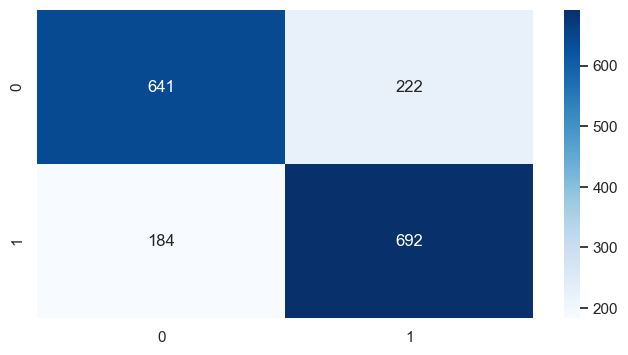

In [109]:
# Logistic regression
data_model(LogisticRegression())

The train accuracy score of DecisionTreeClassifier() model is:  99.95685936151855
The test accuracy score  of DecisionTreeClassifier() model is:  75.15813686026452

--------------------------------------------------------------------------------
The test precision of the DecisionTreeClassifier() model is:  0.749438202247191

--------------------------------------------------------------------------------
The test f1 score of the DecisionTreeClassifier() model is:  0.7553793884484711

--------------------------------------------------------------------------------
The test recall of the DecisionTreeClassifier() model is:  0.7614155251141552

Confusion matrix of the DecisionTreeClassifier() model: 



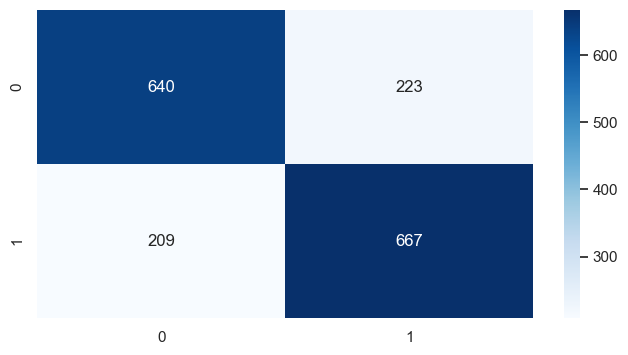

In [110]:
# Decision tree
data_model(DecisionTreeClassifier())

The train accuracy score of RandomForestClassifier() model is:  99.95685936151855
The test accuracy score  of RandomForestClassifier() model is:  80.10350776308222

--------------------------------------------------------------------------------
The test precision of the RandomForestClassifier() model is:  0.8255528255528255

--------------------------------------------------------------------------------
The test f1 score of the RandomForestClassifier() model is:  0.795266272189349

--------------------------------------------------------------------------------
The test recall of the RandomForestClassifier() model is:  0.7671232876712328

Confusion matrix of the RandomForestClassifier() model: 



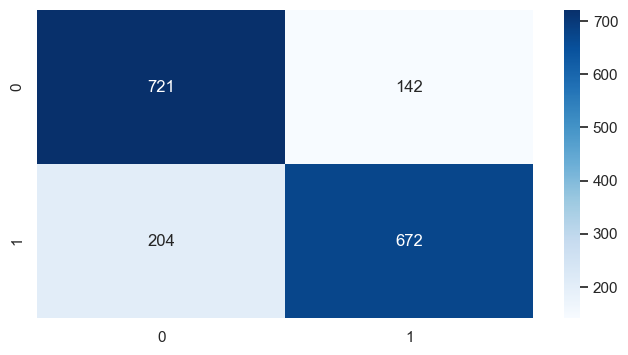

In [111]:
# Random Forest
data_model(RandomForestClassifier())

The train accuracy score of GradientBoostingClassifier() model is:  82.48490077653149
The test accuracy score  of GradientBoostingClassifier() model is:  79.35595169637722

--------------------------------------------------------------------------------
The test precision of the GradientBoostingClassifier() model is:  0.7782561894510226

--------------------------------------------------------------------------------
The test f1 score of the GradientBoostingClassifier() model is:  0.8011080332409972

--------------------------------------------------------------------------------
The test recall of the GradientBoostingClassifier() model is:  0.8253424657534246

Confusion matrix of the GradientBoostingClassifier() model: 



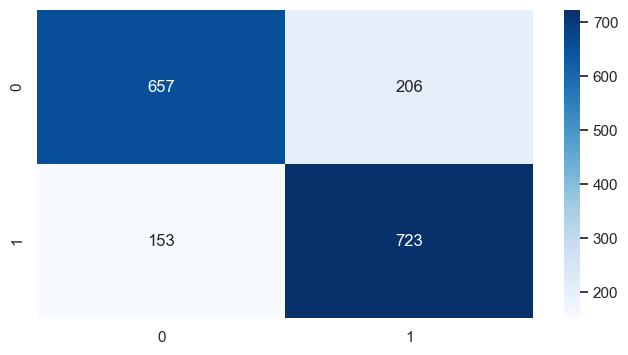

In [112]:
# Gradient Boosting classifier
data_model(GradientBoostingClassifier())

The train accuracy score of AdaBoostClassifier() model is:  79.86770204199021
The test accuracy score  of AdaBoostClassifier() model is:  79.29844738355378

--------------------------------------------------------------------------------
The test precision of the AdaBoostClassifier() model is:  0.7665289256198347

--------------------------------------------------------------------------------
The test f1 score of the AdaBoostClassifier() model is:  0.8047722342733189

--------------------------------------------------------------------------------
The test recall of the AdaBoostClassifier() model is:  0.8470319634703196

Confusion matrix of the AdaBoostClassifier() model: 



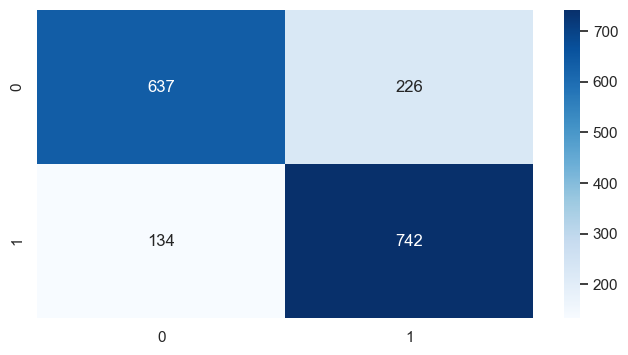

In [113]:
# AdaBoost Classifier
data_model(AdaBoostClassifier())

The train accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model is:  94.19039401783147
The test accuracy score  of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, earl

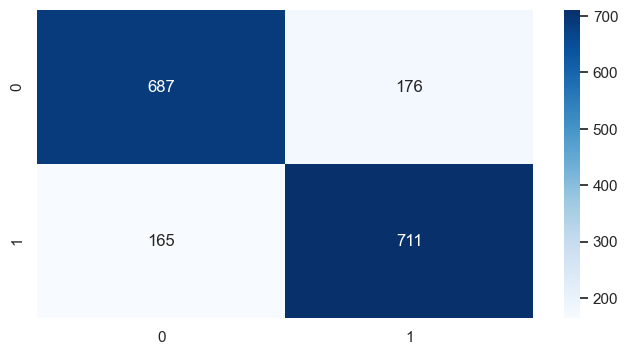

In [114]:
# XGBOOST
data_model(XGBClassifier())

The train accuracy score of <catboost.core.CatBoostClassifier object at 0x00000289B8C9CE80> model is:  87.97814207650273
The test accuracy score  of <catboost.core.CatBoostClassifier object at 0x00000289B8C9CE80> model is:  81.02357676825763

--------------------------------------------------------------------------------
The test precision of the <catboost.core.CatBoostClassifier object at 0x00000289B8C9CE80> model is:  0.8040089086859689

--------------------------------------------------------------------------------
The test f1 score of the <catboost.core.CatBoostClassifier object at 0x00000289B8C9CE80> model is:  0.8139797068771139

--------------------------------------------------------------------------------
The test recall of the <catboost.core.CatBoostClassifier object at 0x00000289B8C9CE80> model is:  0.8242009132420092

Confusion matrix of the <catboost.core.CatBoostClassifier object at 0x00000289B8C9CE80> model: 



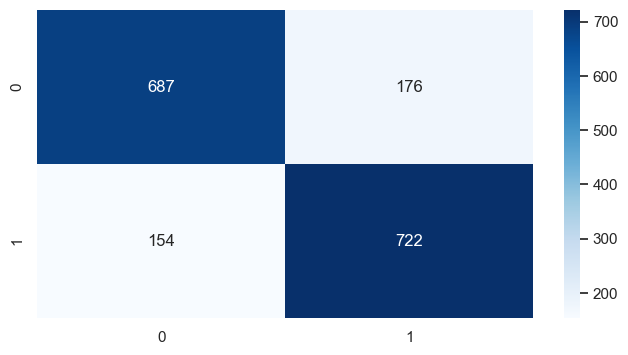

In [116]:
# CatBoostClassifier
data_model(CatBoostClassifier(verbose=False))

StackingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#### **1. Logistic Regression**

In [123]:
# Libraries
from sklearn.linear_model import LogisticRegressionCV

logreg_params = {
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100]
}

logreg_model = LogisticRegressionCV(Cs=logreg_params['C'], cv=5)
logreg_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5)

In [124]:
dir(logreg_model)

['C_',
 'Cs',
 'Cs_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'coefs_paths_',
 'cv',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio_',
 'l1_ratios',
 'l1_ratios_',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_lo

In [125]:
# After fitting the LogisticRegressionCV model
best_score = logreg_model.scores_[1].max()  # Get the best mean score for class 1 (positive class)
best_params = logreg_model.C_  # Get the best value of C

print("Best Mean Score:", best_score)
print("Best C:", best_params)


Best Mean Score: 0.7289204097714737
Best C: [0.1]


In [126]:
# Metrics
from sklearn.metrics import accuracy_score, recall_score

# Make predictions on the test dataset
logreg_y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, logreg_y_pred)
recall = recall_score(y_test, logreg_y_pred)

print("Accuracy Score:", accuracy)
print('Recall score:', recall)


Accuracy Score: 0.7181588902900379
Recall score: 0.6234413965087282


In [127]:
# Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(),
                    param_grid=logreg_params,
                    scoring='recall', 
                    cv=5,
                    return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [128]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

In [129]:
def best_score_params(model):
    # Print the best score
    print('best score:', model.best_score_)

    # Print the best hyperparams
    print('best hyperparams:', model.best_params_)

best_score_params(grid)

best score: 0.6245334507042253
best hyperparams: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [130]:
def accuracy_recall(model):
    y_pred = model.predict(X_test)
    print("Accuracy score: ",accuracy_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))

accuracy_recall(grid)

Accuracy score:  0.71437578814628
Recall score:  0.6259351620947631


In [131]:
# Without parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accuracy_recall(logreg)

Accuracy score:  0.7181588902900379
Recall score:  0.6234413965087282


**The metrics to be used is recall. <br> This is because the cost of missing a positive case (passengers who were transported) is high.**

#### **2. Decision Tree**

In [132]:
# Library
from sklearn.tree import DecisionTreeClassifier

decision_tree_params = {
    'criterion': ['gini'],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'random_state': [42],
}

decision_treee_grid = GridSearchCV(DecisionTreeClassifier(),
                                   param_grid=decision_tree_params,
                                   cv=5,
                                   scoring='recall')

decision_treee_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]},
             scoring='recall')

In [133]:
best_score_params(decision_treee_grid)

best score: 0.6420539906103286
best hyperparams: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [134]:
accuracy_recall(decision_treee_grid)

Accuracy score:  0.7383354350567465
Recall score:  0.6408977556109726


In [135]:
# Without parameters
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
accuracy_recall(clf)

Accuracy score:  0.7181588902900379
Recall score:  0.6084788029925187


In [136]:
best_model = decision_treee_grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

#### **XGBoost**

In [137]:
# Library
import xgboost as xgb

xgboost_params = {
    'n_estimators': [100],
    'max_depth': [2],
    'learning_rate': [100],
    'gamma': [10],
    'subsample': [0.9],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgboost_grid = GridSearchCV(xgb.XGBClassifier(),
                            param_grid=xgboost_params,
                            cv=5)

xgboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [138]:
best_score_params(xgboost_grid)

best score: 0.7391238039838617
best hyperparams: {'eval_metric': 'logloss', 'gamma': 10, 'learning_rate': 100, 'max_depth': 2, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.9}


In [139]:
accuracy_recall(xgboost_grid)

Accuracy score:  0.7364438839848676
Recall score:  0.6346633416458853


In [140]:
# Without parameters
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)
accuracy_recall(xgbc)

Accuracy score:  0.7301387137452712
Recall score:  0.6172069825436409


#### **Support Vector Machine**

In [60]:
# Library
from sklearn.svm import SVC

svc_params = {
    'kernel': ['linear'],
    'C': [1,10,100],
    'gamma': [1, 10, 100]
}

svc_grid = GridSearchCV(SVC(),
                        param_grid=svc_params,
                        cv=3)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 10, 100],
                         'kernel': ['linear']})

In [141]:
accuracy_recall(svc_grid)

Accuracy score:  0.723203026481715
Recall score:  0.5847880299251871


In [142]:
best_score_params(svc_grid)

best score: 0.7213118591729272
best hyperparams: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [143]:
model1 = grid
model2 = decision_treee_grid
model3 = xgboost_grid
model4 = svc_grid
# Create a list of the models
models = [model1, model2, model3, model4]

# Create lists to store accuracy and recall values
accuracy_values = []
recall_values = []

# Calculate accuracy and recall for each model and store the results
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    recall_values.append(recall)

# Create a DataFrame 
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM']
model_results = {
    'Model Name': model_names,
    'Accuracy': accuracy_values,
    'Recall': recall_values
}
results_df = pd.DataFrame(model_results)
results_df

,Model Name,Accuracy,Recall
0,Logistic Regression,0.714376,0.625935
1,Decision Tree,0.738335,0.640898
2,XGBoost,0.736444,0.634663
3,SVM,0.723203,0.584788


In [144]:
# Find the best model based on recall
best_model = results_df.loc[results_df['Recall'].idxmax()]

print("Best Model (based on Recall):")
best_model

Best Model (based on Recall):


Model Name    Decision Tree
Accuracy           0.738335
Recall             0.640898
Name: 1, dtype: object

In [145]:
X_test

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age
7685,0.0,0.0,1.0,1.0,0.0,0.0,0.0,32.0
188,0.0,0.0,1.0,0.0,0.0,1.0,0.0,33.0
642,0.0,1.0,0.0,1.0,0.0,0.0,0.0,65.0
2550,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66.0
7111,0.0,0.0,1.0,0.0,0.0,1.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2915,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0
6788,1.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0
1726,1.0,0.0,0.0,0.0,1.0,0.0,1.0,46.0


In [148]:
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,0
1,Earth,False,TRAPPIST-1e,24.0,1
2,Europa,False,TRAPPIST-1e,58.0,0
3,Europa,False,TRAPPIST-1e,33.0,0
4,Earth,False,TRAPPIST-1e,16.0,1
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,0
8689,Earth,True,PSO J318.5-22,18.0,0
8690,Earth,False,TRAPPIST-1e,26.0,1
8691,Europa,False,55 Cancri e,32.0,0


In [ ]:
predict = decision_treee_grid.predict(X_test)
predict

array([0, 0, 0, ..., 0, 1, 0])

In [232]:
# Test data
test_data = pd.read_csv('test.csv')
test_data['PassengerId'] = test_data['PassengerId'].astype(int)
test_data1 = test_data[['HomePlanet', 'CryoSleep', 'Destination', 'Age']]
test_data1['CryoSleep'] = test_data1['CryoSleep'].fillna(False)

test_data1['CryoSleep'] = test_data1[['CryoSleep']].astype(int)
test_data1 = pd.get_dummies(test_data1)
test_data1

,CryoSleep,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,1,0,0,0,0,1
1,0,19.0,1,0,0,0,0,1
2,1,31.0,0,1,0,1,0,0
3,0,38.0,0,1,0,0,0,1
4,0,20.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4272,1,34.0,1,0,0,0,0,1
4273,0,42.0,1,0,0,0,0,1
4274,1,NaN,0,0,1,1,0,0
4275,0,NaN,0,1,0,0,0,0


In [233]:
print_missing_values(test_data1)

Columns with missing values:

     Count  Percentage
Age     91     2.12766


In [234]:
test_data1['Age'] = test_data1['Age'].fillna(test_data1.Age.median())
test_data1


,CryoSleep,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,1,0,0,0,0,1
1,0,19.0,1,0,0,0,0,1
2,1,31.0,0,1,0,1,0,0
3,0,38.0,0,1,0,0,0,1
4,0,20.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4272,1,34.0,1,0,0,0,0,1
4273,0,42.0,1,0,0,0,0,1
4274,1,26.0,0,0,1,1,0,0
4275,0,26.0,0,1,0,0,0,0


In [235]:
print_missing_values(test_data1)

Columns with missing values:

Empty DataFrame
Columns: [Count, Percentage]
Index: []


In [236]:
prediction = decision_treee_grid.predict(test_data1)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [237]:
test_data['Transported'] = prediction
test_data 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1301,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1
1,1801,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1
2,1901,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1
3,2101,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,2301,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,926602,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,926901,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1
4274,927101,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1
4275,927301,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


In [238]:
test_data.Transported.unique()

array([1])